<a href="https://colab.research.google.com/github/9more/Projects/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network algorithm for a single layer without custom libraries like Pytorch and Tensorflow.
The model has four functions--model_train, model_eval, model_predict and history_graph. The step
by step codes shows what goes on umder the hood.
Feel free to use it for your analysis 😏

In [35]:
"""Neural Network algorithm for a single layer without custom libraries like Pytorch and Tensorflow.
The model has four functions--model_train, model_eval, model_predict and history_graph. The step
by step codes shows what goes on umder the hood.
Feel free to use it for your analysis """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x, y= np.random.rand(100,5), np.random.rand(100,1)
label= np.where(y>0.5,1,0)
Xtrain, label_train= x[:80], label[:80]
Xtest, label_test= x[80:], label[80:]

history=[]
def model_train(Xtrain, ytrain,activation='sigmoid'):
  np.random.seed(8)
  w=np.random.rand(1,5)
  b=np.random.rand(1,)  #initialising weights
  for i in range(80):
    z=w@Xtrain.T + b
    if activation=='relu':yhat=np.maximum(0,z)
    else:yhat=1/(1+np.exp(-z))   #sigmoid function activation
    e=yhat-label_train.T
    history.append((e@e.T/len(Xtrain)).squeeze())
    w=w-(e@Xtrain)*0.02/len(Xtrain)       # Gradient descent
    b= b-(e.sum()*0.02)/len(Xtrain)
  return w, b, yhat, history

def model_eval(label_test, Xtest, w, b):
  z=w@Xtest.T + b
  yhat=1/(1+np.exp(-z))
  score = np.where(yhat>=0.5,1,0)
  accuracy = (score==label_test.T).sum()/20
  FP = ((label_test.T == 0) & (score == 1)).sum()
  TP = (label_test.T ==score).sum()
  FN=((label_test.T == 1) & (score == 0)).sum()
  TN=((label_test.T == 0) & (score == 0)).sum()
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
  return metrics ,score, yhat, z

def model_prediction(Xtest, w, b):
  z=w.T*Xtest + b
  yhat=1/(1+np.exp(-z))
  return yhat

def history_graph(history):
  plt.style.use('ggplot')
  plt.figure(figsize=(5,5))
  plt.plot(history, color = 'r')
  plt.title('History Graph')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()


###Testing the algorith with generated random numbers

In [36]:
new=model_train(Xtrain, label_train, activation='sigmoid')

In [37]:
w, b, yhat, history=new[0], new[1], new[2], new[3]

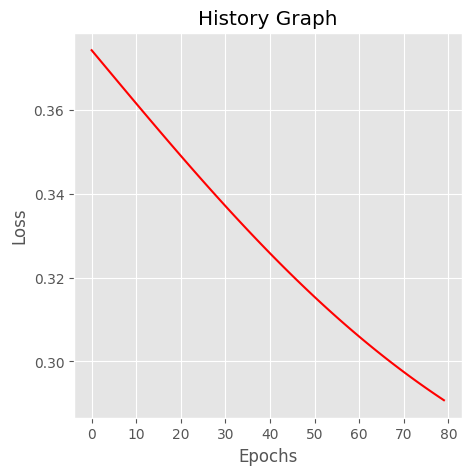

In [38]:
history_graph(history)

In [ ]:
met= model_eval(label_test, Xtest, w, b)
score, hat, z= met[1], met[2], met[3]
print(score)
print(hat)
print(z)